# Author: Santiago Ortiz Ceballos
## Medellín, Colombia - 27/May/2020
## University student from: University of Antioquia 

# Covid19 in Colombia - Dataset Analyze

This notebook inspect the Colombian government's database about covid-19 cases. It reports the cases notified, diagnosed, recovered and dead in each city until May 27, 2020. It also includes relevant aspects such as the seriousness of each person and the origin of their infection

The database can be read or downloaded from this link:
https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr/data

# 1. Set up the dataset

In [1]:
import csv

In [2]:
file = open('Casos_positivos_de_COVID-19_en_Colombia.csv', 'rt',encoding = 'utf-8')
content = csv.reader(file, delimiter = ',')

In [3]:
header = file.readline()

In [4]:
header

'ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito ,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web\n'

## Clean of the header

In [5]:
header = header.strip().split(',')
header

['ID de caso',
 'Fecha de notificación',
 'Codigo DIVIPOLA',
 'Ciudad de ubicación',
 'Departamento o Distrito ',
 'atención',
 'Edad',
 'Sexo',
 'Tipo',
 'Estado',
 'País de procedencia',
 'FIS',
 'Fecha de muerte',
 'Fecha diagnostico',
 'Fecha recuperado',
 'fecha reporte web']

## Build the dataset with the respect casting of each interest value

In [6]:
import time

In [7]:
dataset = []
for row in content:
    # Match each value with it's category
    
    # Casting for data
    dictionary = dict(zip(header, row)) 
    dictionary['Edad'] = int(dictionary['Edad'])
    dictionary['ID de caso'] = int(dictionary['ID de caso'])
    dictionary['Edad'] = int(dictionary['Edad'])
    dictionary['Estado'] = dictionary['Estado'].lower()
    
    # Casting for time
    if (len(dictionary['Fecha de notificación']) > 6):
        dictionary['Fecha de notificación'] = time.strptime(dictionary['Fecha de notificación'][:10], "%Y-%m-%d")
    if (len(dictionary['Fecha diagnostico']) > 6):
        dictionary['Fecha diagnostico'] = time.strptime(dictionary['Fecha diagnostico'][:10], "%Y-%m-%d")
    if (len(dictionary['Fecha de muerte']) > 6):
        dictionary['Fecha de muerte'] = time.strptime(dictionary['Fecha de muerte'][:10], "%Y-%m-%d")
    if (len(dictionary['Fecha recuperado']) > 6):
        dictionary['Fecha recuperado'] = time.strptime(dictionary['Fecha recuperado'][:10], "%Y-%m-%d")
    
    dataset.append(dictionary)

In [8]:
len(dataset)

23003

## A glance at the dataset. This is what each line looks like:

In [9]:
dataset[10]

{'ID de caso': 11,
 'Fecha de notificación': time.struct_time(tm_year=2020, tm_mon=3, tm_mday=11, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=71, tm_isdst=-1),
 'Codigo DIVIPOLA': '11001',
 'Ciudad de ubicación': 'Bogotá D.C.',
 'Departamento o Distrito ': 'Bogotá D.C.',
 'atención': 'Recuperado',
 'Edad': 42,
 'Sexo': 'F',
 'Tipo': 'Importado',
 'Estado': 'leve',
 'País de procedencia': 'España',
 'FIS': '2020-03-06T00:00:00.000',
 'Fecha de muerte': '-   -',
 'Fecha diagnostico': time.struct_time(tm_year=2020, tm_mon=3, tm_mday=12, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=72, tm_isdst=-1),
 'Fecha recuperado': time.struct_time(tm_year=2020, tm_mon=3, tm_mday=31, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=91, tm_isdst=-1),
 'fecha reporte web': '2020-03-12T00:00:00.000'}

# 2. Simple Statistics

In [10]:
from collections import defaultdict

In [11]:
location = defaultdict(int)
ages = defaultdict(int)
sex = defaultdict(int)
kind = defaultdict(int)
state = defaultdict(int)
origin = defaultdict(int)

for data in dataset:
    location[data['Ciudad de ubicación']] += 1
    ages[data['Edad']] += 1
    sex[data['Sexo']] += 1
    kind[data['Tipo']] += 1
    state[data['Estado']] += 1
    origin[data['País de procedencia']] += 1
    

## Top 10 Cases by city

In [12]:
sorted(location.items(), key=lambda x: x[1], reverse=True)[:10] 

[('Bogotá D.C.', 7743),
 ('Cartagena de Indias', 2220),
 ('Cali', 2089),
 ('Barranquilla', 1576),
 ('Leticia', 1494),
 ('Villavicencio', 935),
 ('Soledad', 892),
 ('San Andrés de Tumaco', 514),
 ('Medellín', 470),
 ('Santa Marta', 291)]

## Top 10 affected ages

In [13]:
sorted(ages.items(), key=lambda x: x[1], reverse=True)[:10]

[(29, 600),
 (30, 587),
 (27, 585),
 (26, 576),
 (25, 565),
 (28, 565),
 (31, 561),
 (32, 542),
 (24, 535),
 (34, 506)]

## Number of men and women affected

In [14]:
sorted(sex.items(), key=lambda x: x[1], reverse=True)

[('M', 12925), ('F', 10078)]

## Number of each type of case

In [15]:
sorted(kind.items(), key=lambda x: x[1], reverse=True)[:10] # Top 10

[('En estudio', 15827),
 ('Relacionado', 6324),
 ('Importado', 850),
 ('Desconocido', 2)]

# State of people

In [16]:
sorted(state.items(), key=lambda x: x[1], reverse=True)[:10] # Top 10

[('leve', 18005),
 ('asintomático', 2785),
 ('moderado', 1155),
 ('fallecido', 776),
 ('grave', 248),
 ('', 34)]

## Top 10 Origin Country

In [17]:
sorted(origin.items(), key=lambda x: x[1], reverse=True)[:10] # Top 10

[('Colombia', 22143),
 ('España', 261),
 ('Estados Unidos de América', 216),
 ('México', 51),
 ('Ecuador', 50),
 ('Brasil', 44),
 ('Panamá', 34),
 ('Turquía', 28),
 ('Francia', 18),
 ('Jamaica', 16)]

## Average days of diagnose, recover and die, from notification

In [18]:
days_to_diagnose = []
days_to_die = []
days_to_recovery = []
for data in dataset:
    if (isinstance(data['Fecha de notificación'], tuple)) and (isinstance(data['Fecha de muerte'], tuple)):
        diff = time.mktime(data['Fecha de muerte']) - time.mktime(data['Fecha de notificación'])
        if (diff > 0):
            diff = time.gmtime(diff).tm_mday
            days_to_die.append(diff)
    if (isinstance(data['Fecha de notificación'], tuple)) and (isinstance(data['Fecha recuperado'], tuple)):
        diff = time.mktime(data['Fecha recuperado']) - time.mktime(data['Fecha de notificación'])
        if (diff > 0):
            diff = time.gmtime(diff).tm_mday
            days_to_recovery.append(diff)
    if (isinstance(data['Fecha de notificación'], tuple)) and (isinstance(data['Fecha diagnostico'], tuple)):
        diff = time.mktime(data['Fecha diagnostico']) - time.mktime(data['Fecha de notificación'])
        if (diff > 0):
            diff = time.gmtime(diff).tm_mday
            days_to_diagnose.append(diff)
            
print("Average number of days to diagnose since notification:")
print(sum(days_to_diagnose)/len(days_to_diagnose))
print("\nAverage number of days to recover from the notification:")
print(sum(days_to_recovery)/len(days_to_recovery))
print("\nAverage number of days to die since notification")
print(sum(days_to_die)/len(days_to_die))

Average number of days to diagnose since notification:
6.531129024912329

Average number of days to recover from the notification:
16.443233424159853

Average number of days to die since notification
9.587976539589443


# 3. Data Visualization

In [19]:
import matplotlib.pyplot as plt

## 1. Line Plot

Sorted the dataset by dates

In [20]:
sortedByTimeDataset = dataset.copy()

for row in sortedByTimeDataset:
    if isinstance(row['Fecha de notificación'], tuple):
        row['Fecha de notificación'] = time.mktime(row['Fecha de notificación'])
        
sortedByTimeDataset = sorted(sortedByTimeDataset, reverse=True, key=lambda x: x['Fecha de notificación'])

### This Function allows to count the number of cases notified each day

In [21]:
def evolution(dataset,city):
    city_infection = defaultdict(int)
    for row in dataset:
        if row['Ciudad de ubicación'] == str(city):
            city_infection[row['Fecha de notificación']] += 1
                
    return city_infection

In [22]:
infection_Bogota = evolution(sortedByTimeDataset,'Bogotá D.C.')
infection_Medellin = evolution(sortedByTimeDataset,'Medellín')
infection_Cali = evolution(sortedByTimeDataset,'Cali')
infection_Santa_Marta = evolution(sortedByTimeDataset,'Santa Marta')
infection_Villavicencio = evolution(sortedByTimeDataset,'Villavicencio')
infection_Barranquilla = evolution(sortedByTimeDataset,'Barranquilla')
infection_Leticia = evolution(sortedByTimeDataset,'Leticia')


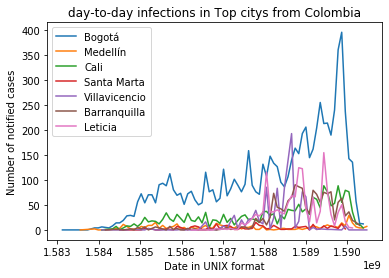

In [23]:
plt.title('day-to-day infections in Top citys from Colombia')
plt.xlabel('Date in UNIX format')
plt.ylabel('Number of notified cases')

plt.plot(list(infection_Bogota.keys()),
         list(infection_Bogota.values()))

plt.plot(list(infection_Medellin.keys()),
         list(infection_Medellin.values()))

plt.plot(list(infection_Cali.keys()),
         list(infection_Cali.values()))

plt.plot(list(infection_Santa_Marta.keys()),
         list(infection_Santa_Marta.values()))

plt.plot(list(infection_Villavicencio.keys()),
         list(infection_Villavicencio.values()))

plt.plot(list(infection_Barranquilla.keys()),
         list(infection_Barranquilla.values()))

plt.plot(list(infection_Leticia.keys()),
         list(infection_Leticia.values()))

plt.legend(['Bogotá','Medellín','Cali','Santa Marta','Villavicencio','Barranquilla','Leticia'])

## 2. Histogram

### This function allows to calculate how the infection is distributed by ages

In [24]:
def distribution(dataset,city):
    age_distribution = defaultdict(int)
    for row in dataset:
        if row['Ciudad de ubicación'] == str(city):
            age_distribution[row['Edad']] += 1
                
    return age_distribution

In [25]:
age_medellin = distribution(dataset,'Medellín')
age_bogota = distribution(dataset,'Bogotá D.C.')
age_cali = distribution(dataset,'Cali')

Total Infected in Medellín:
470


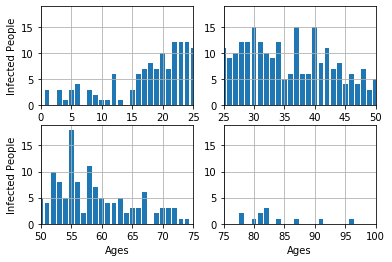

In [26]:
plt.subplot(2,2,1)
plt.bar(age_medellin.keys(),age_medellin.values())
plt.xlim(0,25)
plt.grid()
plt.ylabel('Infected People')

plt.subplot(2,2,2)
plt.bar(age_medellin.keys(),age_medellin.values())
plt.xlim(25,50)
plt.grid()

plt.subplot(2,2,3)
plt.bar(age_medellin.keys(),age_medellin.values())
plt.xlim(50,75)
plt.grid()
plt.xlabel('Ages')
plt.ylabel('Infected People')

plt.subplot(2,2,4)
plt.bar(age_medellin.keys(),age_medellin.values())
plt.xlim(75,100)
plt.grid()
plt.xlabel('Ages')

print("Total Infected in Medellín:")
print(sum(age_medellin.values()))

Total Infected in Bogotá:
7743


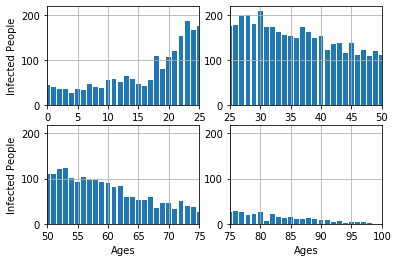

In [27]:
plt.subplot(2,2,1)
plt.bar(age_bogota.keys(),age_bogota.values())
plt.xlim(0,25)
plt.grid()
plt.ylabel('Infected People')

plt.subplot(2,2,2)
plt.bar(age_bogota.keys(),age_bogota.values())
plt.xlim(25,50)
plt.grid()

plt.subplot(2,2,3)
plt.bar(age_bogota.keys(),age_bogota.values())
plt.xlim(50,75)
plt.grid()
plt.xlabel('Ages')
plt.ylabel('Infected People')

plt.subplot(2,2,4)
plt.bar(age_bogota.keys(),age_bogota.values())
plt.xlim(75,100)
plt.grid()
plt.xlabel('Ages')

print("Total Infected in Bogotá:")
print(sum(age_bogota.values()))

Total Infected in Cali:
2089


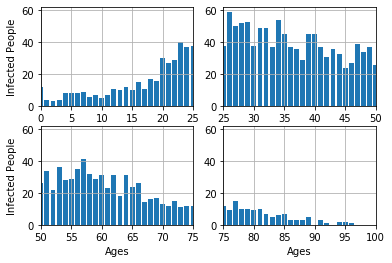

In [28]:
plt.subplot(2,2,1)
plt.bar(age_cali.keys(),age_cali.values())
plt.xlim(0,25)
plt.grid()
plt.ylabel('Infected People')

plt.subplot(2,2,2)
plt.bar(age_cali.keys(),age_cali.values())
plt.xlim(25,50)
plt.grid()

plt.subplot(2,2,3)
plt.bar(age_cali.keys(),age_cali.values())
plt.xlim(50,75)
plt.grid()
plt.xlabel('Ages')
plt.ylabel('Infected People')

plt.subplot(2,2,4)
plt.bar(age_cali.keys(),age_cali.values())
plt.xlim(75,100)
plt.grid()
plt.xlabel('Ages')

print("Total Infected in Cali:")
print(sum(age_cali.values()))

## 3. Scatter

## Is there a relationship between people infected per day and age?

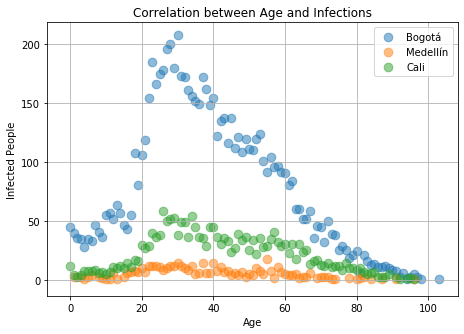

In [29]:
plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(age_bogota.keys(),age_bogota.values(), s=75, alpha=.5)

plt.scatter(age_medellin.keys(),age_medellin.values(), s=75, alpha=.5)

plt.scatter(age_cali.keys(),age_cali.values(), s=75, alpha=.5)

plt.xlabel('Age')
plt.ylabel('Infected People')
plt.grid(True)
plt.title('Correlation between Age and Infections')
plt.legend(['Bogotá','Medellín','Cali'])

- Direction: Positive
- Form: Non-linear
- Strength: Strong
- Outliers: Very Few

From the graphs we conclude that the infected people per day have a relation with the age of the people. Most of the infected per day people are around 20 and 40 years old.

## 4. Bar Plots

### Note: I don't Understand what does this graph means, and it's possible this is a wrong result

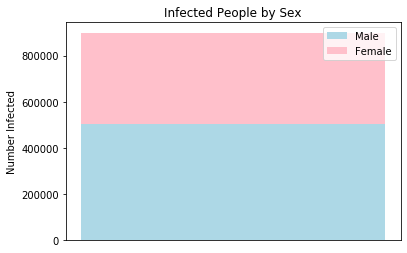

In [30]:
# Example Stacked Bar Chart - Comparisons Between Sexes
# La suma de todos los pesos a partir de la cual estan los pesos
M_recovery = sum([d['Edad'] for d in dataset if d['Sexo'] is 'M'])
F_recovery = sum([d['Edad'] for d in dataset if d['Sexo'] is 'F'])
index = [1]

p1 = plt.bar(index, M_recovery, color='lightblue')
p2 = plt.bar(index, F_recovery, bottom=M_recovery, color='pink')
plt.gca().set(title='Infected People by Sex', ylabel='Number Infected');
plt.xticks([])

plt.legend((p1[0], p2[0]), ('Male', 'Female'))

## 5. Boxplot

### How long it takes for people with symptoms to:

Text(0.5, 1.0, 'Days to Recovery')

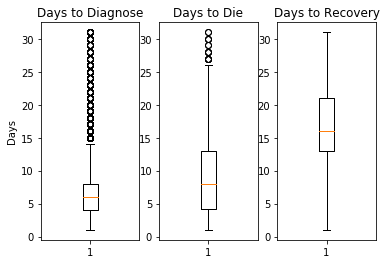

In [31]:
plt.subplot(1,3,1)
plt.boxplot(days_to_diagnose)
plt.title('Days to Diagnose')
plt.ylabel('Days')
plt.subplot(1,3,2)
plt.boxplot(days_to_die)
plt.title('Days to Die')
plt.subplot(1,3,3)
plt.boxplot(days_to_recovery)
plt.title('Days to Recovery')